In [1]:
import numpy as np
import scipy.stats as sps
from glob import glob
import matplotlib.pyplot as plt
import uproot as ur
import ROOT as rt
import ROOT.RooFit as rf
from scipy.special import erf
import sys
sys.path.append('../lib')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, SetMaxToMaxHist, make_ratio_plot
from cebefo_style import Set_2D_colz_graphics
from progressBar import ProgressBar

from analysis_utilities import drawOnCMSCanvas, extarct, extarct_multiple, createSel

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.12/07


In [2]:
import operator
ops = {'>': operator.gt, '<': operator.lt, }

In [3]:
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)

In [4]:
m_D0 = 1.86483 #1e-3*Particle.from_string('D0').mass
print m_D0
m_Dst = 2.01026 #1e-3*Particle.from_string('D*+').mass
print m_Dst
m_B0 = 5.27963 #1e-3*Particle.from_string('B0').mass
print m_B0
m_pi = 0.13957018 #1e-3*Particle.from_string('pi+').mass
print 'mD* - mD0 =', m_Dst - m_D0

1.86483
2.01026
5.27963
mD* - mD0 = 0.14543


In [5]:
cl = rt.TLine()
cl.SetLineColor(6)
cl.SetLineStyle(9)
cl.SetLineWidth(2)

In [6]:
# directory = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU20_10-2-3/job_B02DstMu'
# tMC = ur.open(directory + '/out_CAND_0.root')['outA']['Tevts']
# # print tMC.keys(), '\n\n'
# branches = tMC.keys()
# for b in np.sort(branches):
# #     pass
#     print b
    
# """
#     # branches = [
#     # #             'LumiBlock', 
#     # #             'MC_B_P', 
#     # #             'MC_B_eta', 
#     # #             'MC_B_phi',
#     # #             'MC_B_pt', 
#     # #             'MC_D0_P', 
#     # #             'MC_D0_eta', 
#     # #             'MC_D0_phi', 
#     # #             'MC_D0_pt',
#     # #             'MC_Dst_P', 
#     # #             'MC_Dst_eta',
#     # #             'MC_Dst_phi',
#     # #             'MC_Dst_pt',
#     #             'MC_Ks_P',
#     #             'MC_Ks_eta',
#     #             'MC_Ks_phi',
#     #             'MC_Ks_pt',
#     # #             'MC_pis_P',
#     # #             'MC_pis_eta',
#     # #             'MC_pis_phi',
#     # #             'MC_pis_pt',
#     # #             'Run',
#     # #             'eventNumber',
#     #             'n_B',
#     # #             'n_D0',
#     #             'n_Dst',
#     # #             'n_K',
#     #             'n_Ks',
#     # #             'n_pi',
#     # #             'n_pis',
#     #             'trgMu_charge',
#     #             'trgMu_eta',
#     #             'trgMu_phi',
#     #             'trgMu_pt',
#     #             'B_E',
#     #             'B_P',
#     #             'B_eta',
#     #             'B_phi',
#     #             'B_pt',
#     #             'B_pz',
#     # #             'D0_E',
#     # #             'D0_P',
#     # #             'D0_eta',
#     # #             'D0_phi',
#     # #             'D0_pt',
#     # #             'D0_pz',
#     #             'Dst_E',
#     #             'Dst_P',
#     #             'Dst_eta',
#     #             'Dst_phi',
#     #             'Dst_pt',
#     #             'Dst_pz',
#     # #             'K_E',
#     # #             'K_P',
#     # #             'K_eta',
#     # #             'K_phi',
#     # #             'K_pt',
#     # #             'K_pz',
#     #             'Ks_E',
#     #             'Ks_P',
#     #             'Ks_eta',
#     #             'Ks_phi',
#     #             'Ks_pt',
#     #             'Ks_pz',
#     # #             'chi2_D0pis',
#     #             'chi2_DstK',
#     # #             'chi2_kpi',
#     # #             'cos_D0pis_vtxMu',
#     #             'cos_DstK_vtxBest',
#     # #             'cos_kpi_vtxMu',
#     # #             'd_vtxD0pis_vtxMu',
#     # #             'd_vtxkpi_vtxMu',
#     # #             'dca_D0pis_vtxMu',
#     # #             'dca_kpi_vtxMu',
#     #             'mass_D0pis',
#     #             'mass_DstK',
#     # #             'mass_kpi',
#     # #             'pi_E',
#     # #             'pi_P',
#     # #             'pi_eta',
#     # #             'pi_phi',
#     # #             'pi_pt',
#     # #             'pi_pz',
#     # #             'pis_E',
#     # #             'pis_P',
#     # #             'pis_eta',
#     # #             'pis_phi',
#     # #             'pis_pt',
#     # #             'pis_pz',
#     # #             'sigd_vtxD0pis_vtxMu',
#     # #             'sigd_vtxkpi_vtxMu',
#     # #             'sigdca_D0pis_vtxMu',
#     # #             'sigdca_kpi_vtxMu'
#     # ]
# """

In [7]:
branches = [
    'MC_mu_pt',
    'MC_mu_eta',
    'MC_Dst_pt',
    'MC_Dst_eta',
    'wh_CLNCentral',
    'wh_CLNR2Up'
]

In [8]:
loc = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu'
for name in glob(loc + '/out*.root'):
    d = extarct_multiple(name, branches=['wh_CLNCentral'])
    s = np.sum(np.isnan(d['wh_CLNCentral']))
    if s > 0:
        print name
        print np.argmax(np.isnan(d['wh_CLNCentral']))

Error in file: ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_219.root
Error in file: ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_236.root
Error in file: ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_61.root


# Preliminary study

In [9]:
loc = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu'
tISGW = rt.TChain('outA/Tevts')
for fname in glob(loc + '/out_CAND_*[0-9].root'):
    tISGW.Add(fname)
print 'ISGW'
print 'N files:', tISGW.GetNtrees()
print 'N events:', tISGW.GetEntries()

ISGW
N files: 245
N events: 247167


Error in <TChain::LoadTree>: Cannot find tree with name outA/Tevts in file ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_219.root
Error in <TChain::LoadTree>: Cannot find tree with name outA/Tevts in file ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_236.root
Error in <TChain::LoadTree>: Cannot find tree with name outA/Tevts in file ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_61.root


In [10]:
fn = loc + '/out*.root'
dISGW = extarct_multiple(fn, branches=branches)
print 'Number of events:', dISGW['wh_CLNCentral'].shape[0]

Error in file: ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_219.root
Error in file: ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_236.root
Error in file: ../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_ISGW2_PU0_10-2-3/ntuples_B2DstMu/out_CAND_61.root
Number of events: 247167


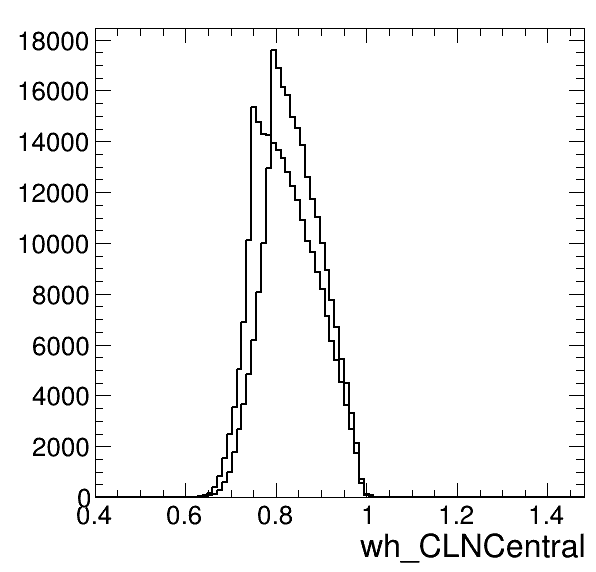

In [11]:
c = rt.TCanvas()
tISGW.Draw('wh_CLNCentral')
tISGW.Draw('wh_CLNR2Up', '', 'same')
c.Draw()

In [16]:
loc = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTFilter5_0p0-evtgen_HQET2_central_PU0_10-2-3/ntuples_B2DstMu'
tHQET = rt.TChain('outA/Tevts')
for fname in glob(loc + '/out_CAND_*[0-9].root'):
    tHQET.Add(fname)
print 'HQET'
print 'N files:', tHQET.GetNtrees()
print 'N events:', tHQET.GetEntries()

HQET
N files: 53
N events: 53183


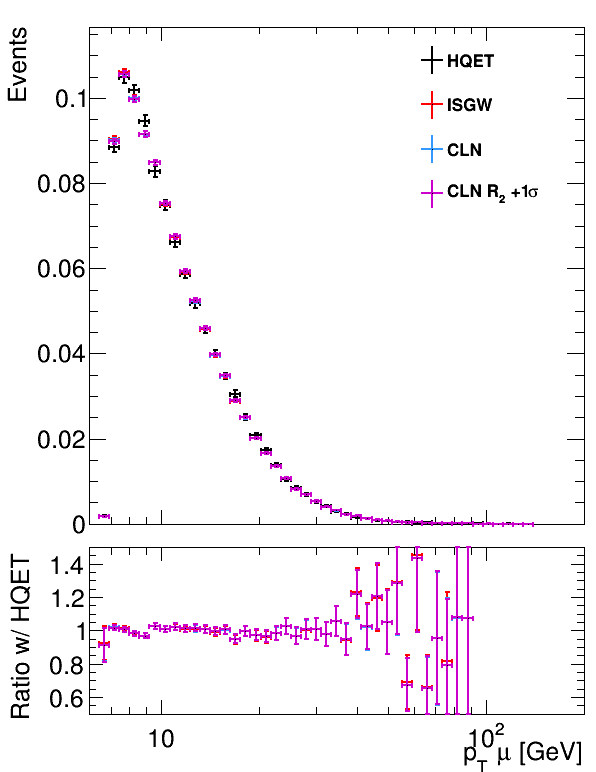

In [20]:
hHQET = create_TH1D(np.zeros(0), name='hHQET',
                title='HQET',
                axis_title=['p_{T} #mu [GeV]', 'Events'],
                binning=np.logspace(np.log10(6),np.log10(200),50)
               )
tHQET.Project('hHQET', 'MC_mu_pt')
hHQET.Sumw2()
hHQET.Scale(1./hHQET.Integral())

hISGW = create_TH1D(np.zeros(0), name='hISGW', title='ISGW', binning=hHQET.binning)
tISGW.Project('hISGW', 'MC_mu_pt')
hISGW.Sumw2()
hISGW.Scale(1./hISGW.Integral())
hISGW.SetLineColor(rt.kRed)

hISGW2HQET = create_TH1D(np.zeros(0), name='hISGW2HQET', title='CLN', binning=hHQET.binning)
tISGW.Project('hISGW2HQET', 'MC_mu_pt', 'wh_CLNCentral')
hISGW2HQET.Sumw2()
hISGW2HQET.Scale(1./hISGW2HQET.Integral())
hISGW2HQET.SetLineColor(rt.kAzure+1)

h3 = create_TH1D(np.zeros(0), name='h3', title='CLN R_{2} +1#sigma', binning=hHQET.binning)
tISGW.Project('h3', 'MC_mu_pt', 'wh_CLNR2Up')
h3.Sumw2()
h3.Scale(1./h3.Integral())
h3.SetLineColor(rt.kMagenta+1)

h_list = [hHQET, hISGW, hISGW2HQET, h3]
# c = drawOnCMSCanvas(CMS_lumi, h_list, 'same')
# c.Draw()
# c.SetLogx()
# c.SetLogy()
# hHQET.GetYaxis().SetRangeUser(0.9, 1.2*hHQET.GetMaximum())

cr = make_ratio_plot(h_list, title = "", label = "", in_tags = None, 
                     ratio_bounds = [0.5, 1.5], 
                     draw_opt = 'E1', 
                     leg_pos=[0.7,0.6,0.9,0.93])
# cr.pad1.SetLogy()
cr.pad1.SetLogx()
cr.pad2.SetLogx()
cr.Draw()

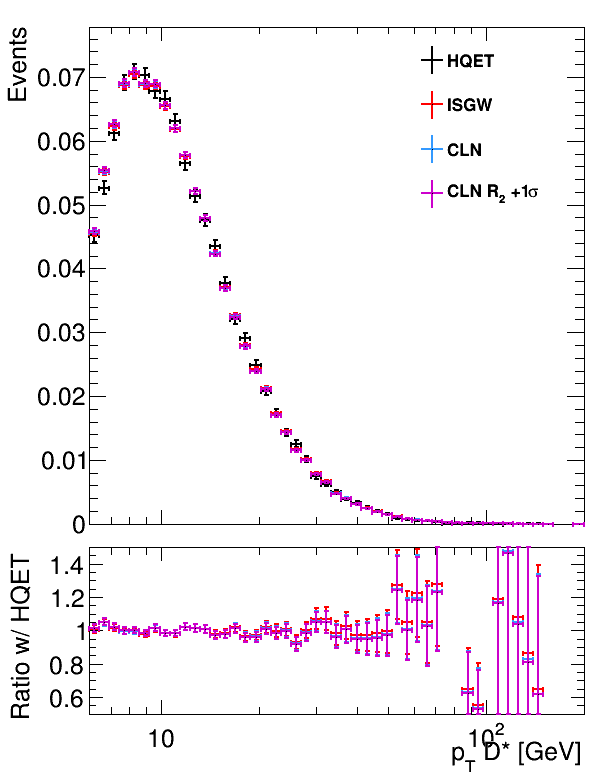

In [39]:
hHQET = create_TH1D(np.zeros(0), name='hHQET',
                title='HQET',
                axis_title=['p_{T} D* [GeV]', 'Events'],
                binning=np.logspace(np.log10(6),np.log10(200),50)
               )
tHQET.Project('hHQET', 'MC_Dst_pt')
hHQET.Sumw2()
hHQET.Scale(1./hHQET.Integral())

hISGW = create_TH1D(np.zeros(0), name='hISGW', title='ISGW', binning=hHQET.binning)
tISGW.Project('hISGW', 'MC_Dst_pt')
hISGW.Sumw2()
hISGW.Scale(1./hISGW.Integral())
hISGW.SetLineColor(rt.kRed)

hISGW2HQET = create_TH1D(np.zeros(0), name='hISGW2HQET', title='CLN', binning=hHQET.binning)
tISGW.Project('hISGW2HQET', 'MC_Dst_pt', 'wh_CLNCentral')
hISGW2HQET.Sumw2()
hISGW2HQET.Scale(1./hISGW2HQET.Integral())
hISGW2HQET.SetLineColor(rt.kAzure+1)

h3 = create_TH1D(np.zeros(0), name='h3', title='CLN R_{2} +1#sigma', binning=hHQET.binning)
tISGW.Project('h3', 'MC_Dst_pt', 'wh_CLNR2Up')
h3.Sumw2()
h3.Scale(1./h3.Integral())
h3.SetLineColor(rt.kMagenta+1)

h_list = [hHQET, hISGW, hISGW2HQET, h3]
# c = drawOnCMSCanvas(CMS_lumi, h_list, 'same')
# c.Draw()
# c.SetLogx()
# c.SetLogy()
# hHQET.GetYaxis().SetRangeUser(0.9, 1.2*hHQET.GetMaximum())

cr = make_ratio_plot(h_list, title = "", label = "", in_tags = None, 
                     ratio_bounds = [0.5, 1.5], 
                     draw_opt = 'E1', 
                     leg_pos=[0.7,0.6,0.9,0.93])
# cr.pad1.SetLogy()
cr.pad1.SetLogx()
cr.pad2.SetLogx()
cr.Draw()

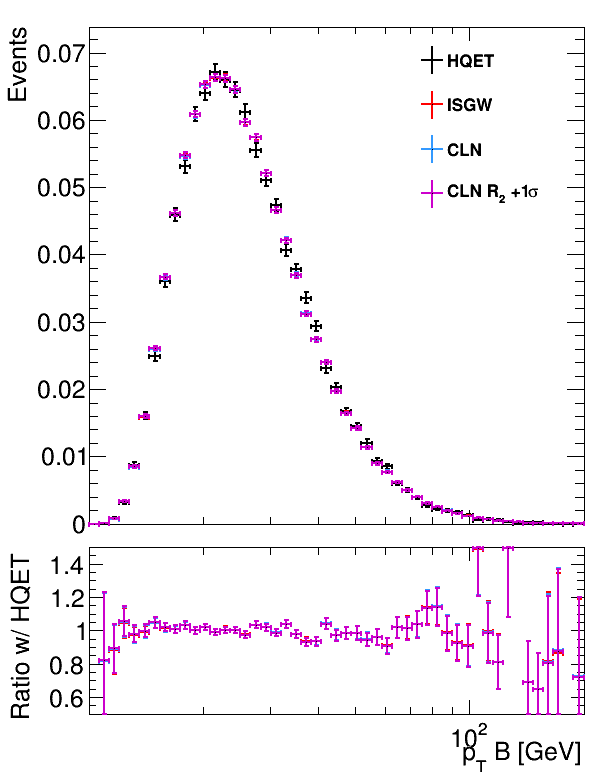

In [41]:
hHQET = create_TH1D(np.zeros(0), name='hHQET',
                title='HQET',
                axis_title=['p_{T} B [GeV]', 'Events'],
                binning=np.logspace(np.log10(10),np.log10(200),50)
               )
tHQET.Project('hHQET', 'MC_B_pt')
hHQET.Sumw2()
hHQET.Scale(1./hHQET.Integral())

hISGW = create_TH1D(np.zeros(0), name='hISGW', title='ISGW', binning=hHQET.binning)
tISGW.Project('hISGW', 'MC_B_pt')
hISGW.Sumw2()
hISGW.Scale(1./hISGW.Integral())
hISGW.SetLineColor(rt.kRed)

hISGW2HQET = create_TH1D(np.zeros(0), name='hISGW2HQET', title='CLN', binning=hHQET.binning)
tISGW.Project('hISGW2HQET', 'MC_B_pt', 'wh_CLNCentral')
hISGW2HQET.Sumw2()
hISGW2HQET.Scale(1./hISGW2HQET.Integral())
hISGW2HQET.SetLineColor(rt.kAzure+1)

h3 = create_TH1D(np.zeros(0), name='h3', title='CLN R_{2} +1#sigma', binning=hHQET.binning)
tISGW.Project('h3', 'MC_B_pt', 'wh_CLNR2Up')
h3.Sumw2()
h3.Scale(1./h3.Integral())
h3.SetLineColor(rt.kMagenta+1)

h_list = [hHQET, hISGW, hISGW2HQET, h3]
# c = drawOnCMSCanvas(CMS_lumi, h_list, 'same')
# c.Draw()
# c.SetLogx()
# c.SetLogy()
# hHQET.GetYaxis().SetRangeUser(0.9, 1.2*hHQET.GetMaximum())

cr = make_ratio_plot(h_list, title = "", label = "", in_tags = None, 
                     ratio_bounds = [0.5, 1.5], 
                     draw_opt = 'E1', 
                     leg_pos=[0.7,0.6,0.9,0.93])
# cr.pad1.SetLogy()
cr.pad1.SetLogx()
cr.pad2.SetLogx()
cr.Draw()

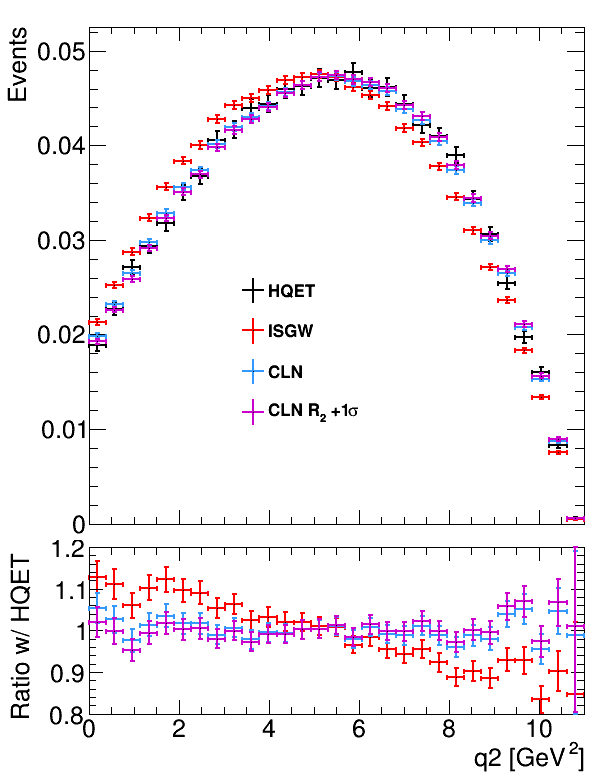

In [33]:
hHQET = create_TH1D(np.zeros(0), name='hHQET',
                title='HQET',
                axis_title=['q2 [GeV^{2}]', 'Events'],
                binning=np.linspace(0,11,30)
               )
tHQET.Project('hHQET', 'MC_q2')
hHQET.Sumw2()
hHQET.Scale(1./hHQET.Integral())

hISGW = create_TH1D(np.zeros(0), name='hISGW', title='ISGW', binning=hHQET.binning)
tISGW.Project('hISGW', 'MC_q2')
hISGW.Sumw2()
hISGW.Scale(1./hISGW.Integral())
hISGW.SetLineColor(rt.kRed)

hISGW2HQET = create_TH1D(np.zeros(0), name='hISGW2HQET', title='CLN', binning=hHQET.binning)
tISGW.Project('hISGW2HQET', 'MC_q2', 'wh_CLNCentral')
hISGW2HQET.Sumw2()
hISGW2HQET.Scale(1./hISGW2HQET.Integral())
hISGW2HQET.SetLineColor(rt.kAzure+1)

h3 = create_TH1D(np.zeros(0), name='h3', title='CLN R_{2} +1#sigma', binning=hHQET.binning)
tISGW.Project('h3', 'MC_q2', 'wh_CLNR2Up')
h3.Sumw2()
h3.Scale(1./h3.Integral())
h3.SetLineColor(rt.kMagenta+1)

h_list = [hHQET, hISGW, hISGW2HQET, h3]
# c = drawOnCMSCanvas(CMS_lumi, h_list, 'same')
# c.Draw()
# c.SetLogx()
# c.SetLogy()
# hHQET.GetYaxis().SetRangeUser(0.9, 1.2*hHQET.GetMaximum())

cr = make_ratio_plot(h_list, title = "", label = "", in_tags = None, 
                     ratio_bounds = [0.8, 1.2], 
                     draw_opt = 'E1', 
                     leg_pos=[0.4,0.2,0.6,0.5])
# cr.pad1.SetLogy()
# cr.pad1.SetLogx()
# cr.pad2.SetLogx()
cr.Draw()

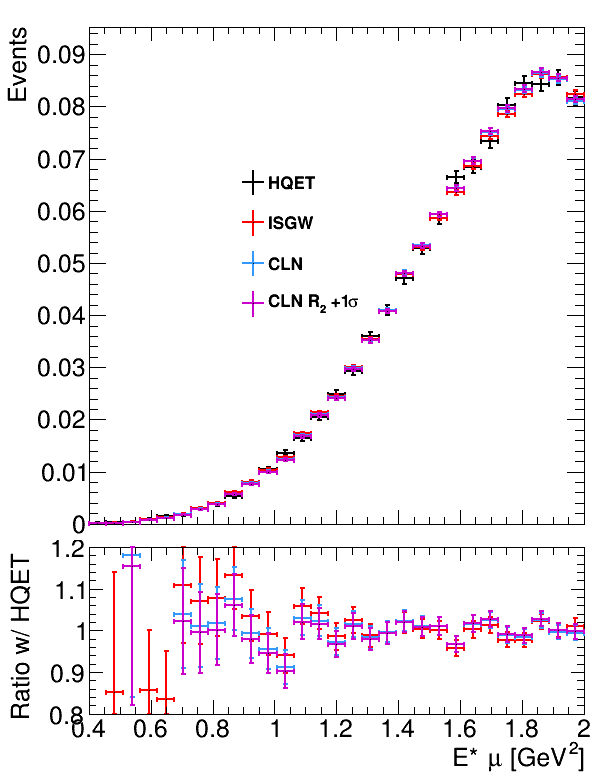

In [37]:
hHQET = create_TH1D(np.zeros(0), name='hHQET',
                title='HQET',
                axis_title=['E* #mu [GeV^{2}]', 'Events'],
                binning=np.linspace(0.4,2,30),
               )
tHQET.Project('hHQET', 'MC_Est_mu')
hHQET.Sumw2()
hHQET.Scale(1./hHQET.Integral())

hISGW = create_TH1D(np.zeros(0), name='hISGW', title='ISGW', binning=hHQET.binning)
tISGW.Project('hISGW', 'MC_Est_mu')
hISGW.Sumw2()
hISGW.Scale(1./hISGW.Integral())
hISGW.SetLineColor(rt.kRed)

hISGW2HQET = create_TH1D(np.zeros(0), name='hISGW2HQET', title='CLN', binning=hHQET.binning)
tISGW.Project('hISGW2HQET', 'MC_Est_mu', 'wh_CLNCentral')
hISGW2HQET.Sumw2()
hISGW2HQET.Scale(1./hISGW2HQET.Integral())
hISGW2HQET.SetLineColor(rt.kAzure+1)

h3 = create_TH1D(np.zeros(0), name='h3', title='CLN R_{2} +1#sigma', binning=hHQET.binning)
tISGW.Project('h3', 'MC_Est_mu', 'wh_CLNR2Up')
h3.Sumw2()
h3.Scale(1./h3.Integral())
h3.SetLineColor(rt.kMagenta+1)

h_list = [hHQET, hISGW, hISGW2HQET, h3]
# c = drawOnCMSCanvas(CMS_lumi, h_list, 'same')
# c.Draw()
# c.SetLogx()
# c.SetLogy()
# hHQET.GetYaxis().SetRangeUser(0.9, 1.2*hHQET.GetMaximum())

cr = make_ratio_plot(h_list, title = "", label = "", in_tags = None, 
                     ratio_bounds = [0.8, 1.2], 
                     draw_opt = 'E1', 
                     leg_pos=[0.4,0.4,0.6,0.7])
# cr.pad1.SetLogy()
# cr.pad1.SetLogx()
# cr.pad2.SetLogx()
cr.Draw()

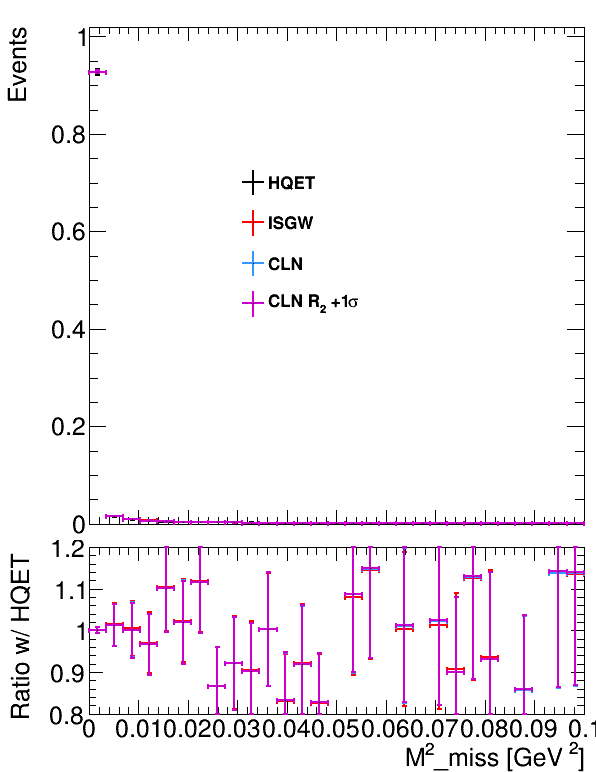

In [47]:
hHQET = create_TH1D(np.zeros(0), name='hHQET',
                title='HQET',
                axis_title=['M^{2}_miss [GeV^{2}]', 'Events'],
                binning=np.linspace(0,0.1,30),
               )
tHQET.Project('hHQET', 'MC_M2_miss')
hHQET.Sumw2()
hHQET.Scale(1./hHQET.Integral())

hISGW = create_TH1D(np.zeros(0), name='hISGW', title='ISGW', binning=hHQET.binning)
tISGW.Project('hISGW', 'MC_M2_miss')
hISGW.Sumw2()
hISGW.Scale(1./hISGW.Integral())
hISGW.SetLineColor(rt.kRed)

hISGW2HQET = create_TH1D(np.zeros(0), name='hISGW2HQET', title='CLN', binning=hHQET.binning)
tISGW.Project('hISGW2HQET', 'MC_M2_miss', 'wh_CLNCentral')
hISGW2HQET.Sumw2()
hISGW2HQET.Scale(1./hISGW2HQET.Integral())
hISGW2HQET.SetLineColor(rt.kAzure+1)

h3 = create_TH1D(np.zeros(0), name='h3', title='CLN R_{2} +1#sigma', binning=hHQET.binning)
tISGW.Project('h3', 'MC_M2_miss', 'wh_CLNR2Up')
h3.Sumw2()
h3.Scale(1./h3.Integral())
h3.SetLineColor(rt.kMagenta+1)

h_list = [hHQET, hISGW, hISGW2HQET, h3]
# c = drawOnCMSCanvas(CMS_lumi, h_list, 'same')
# c.Draw()
# c.SetLogx()
# c.SetLogy()
# hHQET.GetYaxis().SetRangeUser(0.9, 1.2*hHQET.GetMaximum())

cr = make_ratio_plot(h_list, title = "", label = "", in_tags = None, 
                     ratio_bounds = [0.8, 1.2], 
                     draw_opt = 'E1', 
                     leg_pos=[0.4,0.4,0.6,0.7])
# cr.pad1.SetLogy()
# cr.pad1.SetLogx()
# cr.pad2.SetLogx()
cr.Draw()

# Load data

# Cuts declaration

In [ ]:
analysis_selection = {
'mass_MuDst'      : ['<', 5.280],
'cos_MuDst_PV' : ['>', 0.98]
}

In [ ]:
def createSel(d, cut):
    sel = np.ones_like(d[cut.keys()[0]], dtype=bool)
    for k, v in cut.iteritems():
        sel = np.logical_and(sel, ops[v[0]](d[k], v[1]) )
    return sel

# Studing the effect of Hammer reweights

In [ ]:
an_sel = createSel(dMC, analysis_selection)

binning = {
    'q2'      : [20, -2, 10.7],
    'M2_miss' : [40/2, -5, 10],
    'Est_mu'  : [30/2, 0.10, 2.500]
}

varTitle = {
    'q2'      : 'q^{2}',
    'M2_miss' : 'm^{2}_{miss}',
    'Est_mu'  : 'E_{#mu}*'
}

In [ ]:
# for par_name in ['R0', 'R1', 'R2', 'RhoSq']:
par_name = 'R2'
for var in ['Est_mu', 'q2']:

    h = create_TH1D(dMC[var][an_sel], 
                    axis_title=[varTitle[var]+' [GeV]', '1/#sigma d#sigma/d'+varTitle[var]],
                    binning=binning[var],
                    opt='overflow+undeflow',
                    weights=np.repeat(dMC['wh_CLNCentral'], dMC['n_B'].astype(np.int))[an_sel]
                   )
    h.Scale(1./h.Integral())
#     h.Sumw2(0)

    hUp = create_TH1D(dMC[var][an_sel],
                    binning=binning[var],
                    opt='overflow+undeflow',
                    weights=np.repeat(dMC['wh_CLN'+par_name+'Up'], dMC['n_B'].astype(np.int))[an_sel]
                   )
    hUp.Scale(1./hUp.Integral())
    hUp.Sumw2(0)
    hUp.SetLineColor(2)


    hDown = create_TH1D(dMC[var][an_sel],
                    binning=binning[var],
                    opt='overflow+undeflow',
                    weights=np.repeat(dMC['wh_CLN'+par_name+'Down'], dMC['n_B'].astype(np.int))[an_sel]
                   )
    hDown.Scale(1./hDown.Integral())
    hDown.Sumw2(0)
    hDown.SetLineColor(4)

    N = binning[var][0]
    gr_central = rt.TGraph(N)
    gr_central.SetLineColor(1)

    gr_err = rt.TGraphAsymmErrors(N)
    gr_err.SetLineWidth(3)
    gr_err.SetLineColor(8)
    gr_err.SetFillStyle(1)
    gr_err.SetFillColor(8)
    for i in range(1, N+1):
        x = h.GetBinCenter(i)
        dx = 0.5*h.GetBinWidth(i)
        y = h.GetBinContent(i)
        dymax = np.max([hUp.GetBinContent(i), y, hDown.GetBinContent(i)]) - y
        dymin = y - np.min([hUp.GetBinContent(i), y, hDown.GetBinContent(i)])

        gr_central.SetPoint(i-1, x, y)
        gr_err.SetPoint(i-1, x, y)
        gr_err.SetPointError(i-1, dx, dx, dymin, dymax)

    leg = rt.TLegend(0.19, 0.7, 0.44, 0.9)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    leg.AddEntry(gr_err, par_name + ' +/- 1#sigma x10', 'f')
    leg.AddEntry(h, 'Central', 'l')


    # c = drawOnCMSCanvas(CMS_lumi, [h, hUp, hDown], ['same']*3)
    c = drawOnCMSCanvas(CMS_lumi, [h, gr_err, h], ['','2', 'same'], 'c_'+var+par_name)
    leg.Draw()
    c.Draw()